## 토픽 모델링과 문서 군집화
* 토픽 모델링(topic modeling)
    * 비지도 학습으로 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업을 통칭.
    * 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 특정한 성분 분해 방법
### LDA
* 직관적으로 생각하면 LDA 모델은 함께 자주 나타나는 단어의 그룹(토픽)을 찾는 것.
* 각 문서에 토픽의 일부가 혼합되어 있다고 간주.
* 머신러닝에서 토픽은 우리가 일상 대화에서 말하는 '주제'가 아니고, 의미가 있든 없든 PCA나 NMF로 추출한 성분에 가까운 것.

In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

reviews_train = load_files('data/aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [2]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
print('lda.components_.shape:', lda.components_.shape)

lda.components_.shape: (10, 10000)


In [5]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

In [6]:
import mglearn

mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
director      war           show          family        funny         
work          american      series        young         comedy        
performance   years         episode       father        cast          
actors        world         book          woman         role          
quite         documentary   original      us            performance   
between       us            now           mother        fun           
screen        history       years         own           actors        
seems         dvd           tv            world         humor         
music         black         new           real          show          
cinema        during        again         our           always        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [8]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics100 = lda100.fit_transform(X)

In [9]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thief         didn          gay           williams      show          
alex          interesting   ben           mr            episode       
league        pretty        drew          prince        season        
each          lot           festival      emma          shows         
hyde          though        theater       robin         episodes      
asian         going         cliché        zone          tv            
short         wasn          audience      mrs           series        
original      thought       barrymore     lucy          now           
casper        bit           actors        rachel        new           
three         thing         relationship  paltrow       years         
taste         nothing       aids          austen        seasons       
eighties      seemed        director      twilight      always        
doyle 

In [11]:
music = np.argsort(document_topics100[:, 36])[::-1]
for i in music[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'This movie will always be a Broadway and Movie classic, as long as there are still people who sing, dance, and act..\n'
b'Well..\n'
b'A wonder. One of the best musicals ever.\n'
b'Pleasant, diverting and charming. The best part is the swing numbers, especially the rendition of My Buddy, partial though it may have been.\n'
b'For those who like their murder mysteries busy, this is definitely the one to see, as it is chock full of interesting and suspicious characters, most of them wealthy Long Island socialite types. As the star detective, William Powell is alternately starchy and inspired, behaving at times as if he and his suit went to the cleaners and got pressed together.\n'
b'hi for all the people who have seen this wonderful movie im sure thet you would have liked it as much as i. i love the songs once you have seen the show you can sing along as though you are part of the show singing and dancing .\n'
b'This movie was disaster at Box Office, and the reason behind that is innocen

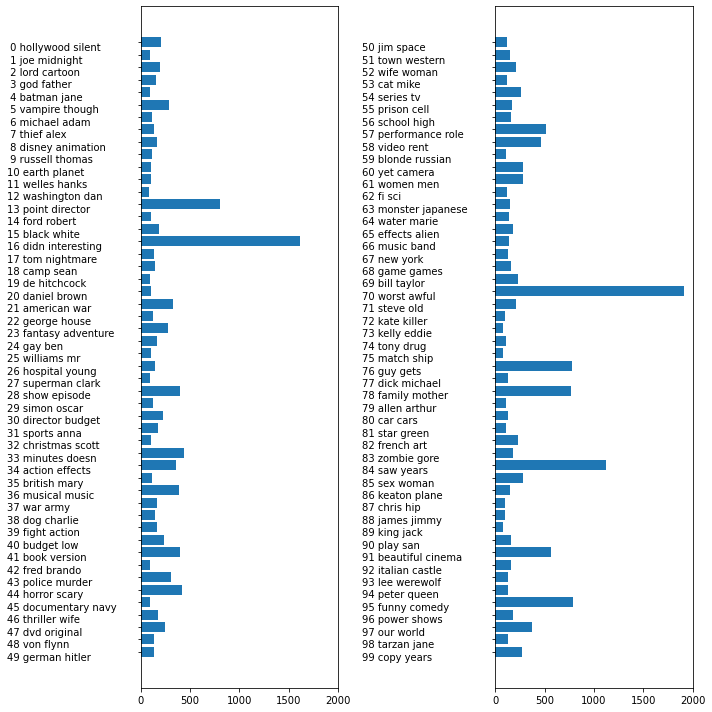

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()